# Models Evaluation

1. Create models
2. Compare models
3. Export .csv file with results

In [1]:
import pandas as pd
from datetime import date

import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn import metrics

In [2]:
train_data = pd.read_pickle("train_data.pkl")
test_data = pd.read_pickle("test_data.pkl")

## Train Test Split

In [3]:
features = list(train_data.columns)
features.remove('status')
features.remove('loan_id')

x = train_data[features]
y = train_data['status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Resampling

Our data analysis stage showed that our working dataset was heavily umbalanced.

Early exploratory analysis of classification methods proved that this was having a negative effect on the accuracy of the classifier, especially for the minority classes. To solve this problem we implemented resampling techniques that would generate a more balanced training set.

For oversampling we used the SMOTE (Synthetic Minority Over-sampling Technique) algorithm. This generates new samples interpolated from the existing ones.

In [4]:
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

Some of the algorithms we plan on using (KNN and SVM) require the data to be standardized. To do so, we used a StandardScaler from SciKit Learn's preprocessing library.

In [5]:
scaler = StandardScaler()

scaler.fit(x_train)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## Models

In [6]:
def apply_model(model, algorithm):
    model.fit(x_train, y_train)

    #Predict the response for test dataset
    model_pred = model.predict(x_test)
    model_pred_proba = model.predict_proba(x_test)[:, -1]

    # Metrics
    print(f"\nAUC Score: {metrics.roc_auc_score(y_test, model_pred_proba)}") # Area Under the Curve
    print(f"Confusion matrix:\n{metrics.confusion_matrix(y_test, model_pred)}\n")
    print(f"Classification report:\n{metrics.classification_report(y_test, model_pred)}\n")

    metrics.plot_roc_curve(model, x_test, y_test)
    #plt.savefig(f"{algorithm}.png")
    plt.show
    
    return model

## Decision Tree Classifier


AUC Score: 0.6731092436974788
Confusion matrix:
[[ 9  5]
 [35 50]]

Classification report:
              precision    recall  f1-score   support

           0       0.20      0.64      0.31        14
           1       0.91      0.59      0.71        85

    accuracy                           0.60        99
   macro avg       0.56      0.62      0.51        99
weighted avg       0.81      0.60      0.66        99




C:\Users\fmna\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(


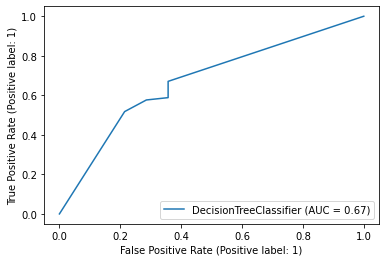

In [7]:
dtc = apply_model(DecisionTreeClassifier(criterion='entropy', max_features='sqrt', min_impurity_split=0.05, min_samples_leaf=2, min_samples_split=8, random_state=0), "dt")

## Random Forest


AUC Score: 0.765126050420168
Confusion matrix:
[[10  4]
 [29 56]]

Classification report:
              precision    recall  f1-score   support

           0       0.26      0.71      0.38        14
           1       0.93      0.66      0.77        85

    accuracy                           0.67        99
   macro avg       0.59      0.69      0.57        99
weighted avg       0.84      0.67      0.72        99




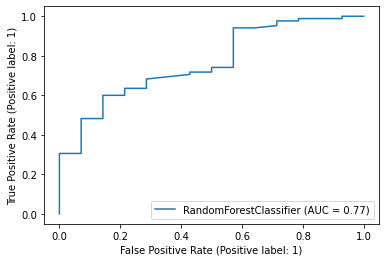

In [8]:
rf = apply_model(RandomForestClassifier(criterion='entropy', n_estimators=1500, random_state=0), "rf")

## KNN


AUC Score: 0.7747899159663866
Confusion matrix:
[[13  1]
 [43 42]]

Classification report:
              precision    recall  f1-score   support

           0       0.23      0.93      0.37        14
           1       0.98      0.49      0.66        85

    accuracy                           0.56        99
   macro avg       0.60      0.71      0.51        99
weighted avg       0.87      0.56      0.62        99




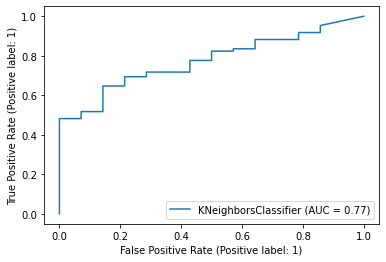

In [9]:
knn = apply_model(KNeighborsClassifier(algorithm='ball_tree', n_neighbors=10, weights='distance'), "knn")

## SVM


AUC Score: 0.7781512605042016
Confusion matrix:
[[ 9  5]
 [20 65]]

Classification report:
              precision    recall  f1-score   support

           0       0.31      0.64      0.42        14
           1       0.93      0.76      0.84        85

    accuracy                           0.75        99
   macro avg       0.62      0.70      0.63        99
weighted avg       0.84      0.75      0.78        99




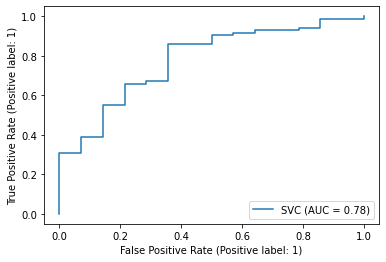

In [10]:
svm = apply_model(SVC(C=10, gamma='auto', probability=True, random_state=0), "svm")

## AdaBoost


AUC Score: 0.6873949579831933
Confusion matrix:
[[ 9  5]
 [41 44]]

Classification report:
              precision    recall  f1-score   support

           0       0.18      0.64      0.28        14
           1       0.90      0.52      0.66        85

    accuracy                           0.54        99
   macro avg       0.54      0.58      0.47        99
weighted avg       0.80      0.54      0.60        99




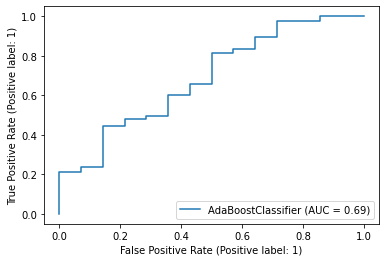

In [11]:
ada = apply_model(AdaBoostClassifier(learning_rate=0.3, n_estimators=100, random_state=0), "ada")

## GradientBoost


AUC Score: 0.7394957983193277
Confusion matrix:
[[11  3]
 [33 52]]

Classification report:
              precision    recall  f1-score   support

           0       0.25      0.79      0.38        14
           1       0.95      0.61      0.74        85

    accuracy                           0.64        99
   macro avg       0.60      0.70      0.56        99
weighted avg       0.85      0.64      0.69        99




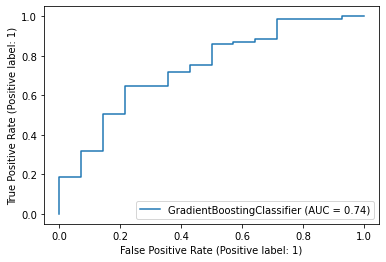

In [12]:
gb = apply_model(GradientBoostingClassifier(learning_rate=0.3, max_features='auto', min_samples_leaf=2, min_samples_split=5, n_estimators=150, random_state=0), "gb")

## XGBoost


AUC Score: 0.7991596638655462
Confusion matrix:
[[12  2]
 [38 47]]

Classification report:
              precision    recall  f1-score   support

           0       0.24      0.86      0.38        14
           1       0.96      0.55      0.70        85

    accuracy                           0.60        99
   macro avg       0.60      0.71      0.54        99
weighted avg       0.86      0.60      0.66        99




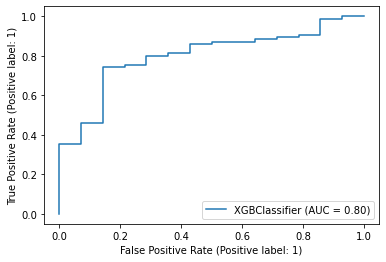

In [14]:
xbg = apply_model(XGBClassifier(alpha=0.01, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0.01, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1,
              monotone_constraints='()', n_estimators=200, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0.00999999978,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None), "xgb")

## Submission

In [ ]:
x_real = test_data[features]

predictions = ada.predict_proba(x_real)[:, -1]

In [ ]:
submission = pd.DataFrame()
submission['Id'] = test_data['loan_id']
submission['Predicted'] = predictions

submission.to_csv(date.today().strftime("%d-%m-%Y") + '.csv', index=False)

In [ ]:
submission